<a href="https://colab.research.google.com/github/julioreis-dev/tutorial_pandas/blob/main/ipea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df_admissao_url = '/content/drive/MyDrive/staging/ipeadata_admissao.csv'
df_demissao_url = '/content/drive/MyDrive/staging/ipeadata_demissao.csv'

In [53]:
df_admissao = pd.read_csv(df_admissao_url, sep=',')
df_demissao = pd.read_csv(df_demissao_url, sep=',')

In [54]:
df_admissao.head()

,Data,Empregados - admissões - Pessoa - Ministério do Trabalho e Emprego- Cadastro Geral de Empregados e Desempregados (MTE/CAGED) - CAGED12_ADMIS,Unnamed: 2
0,1999.05,732704,NaN
1,1999.06,731238,NaN
2,1999.07,685905,NaN
3,1999.08,690144,NaN
4,1999.09,698632,NaN


In [55]:
df_admissao.shape

(248, 3)

In [56]:
df_admissao.columns = ['data', 'admissao', 'descarte']

In [57]:
df_admissao.drop(columns=['descarte'], inplace=True)

In [58]:
df_admissao.head()

,data,admissao
0,1999.05,732704
1,1999.06,731238
2,1999.07,685905
3,1999.08,690144
4,1999.09,698632


In [59]:
df_admissao.isnull().sum()

data        0
admissao    0
dtype: int64

In [60]:
df_demissao.head()

,Data,Empregados - demissões - Pessoa - Ministério do Trabalho e Emprego- Cadastro Geral de Empregados e Desempregados (MTE/CAGED) - CAGED12_DESLIG,Unnamed: 2
0,1999.05,635522,NaN
1,1999.06,673129,NaN
2,1999.07,677848,NaN
3,1999.08,676838,NaN
4,1999.09,691425,NaN


In [61]:
df_demissao.shape

(247, 3)

In [62]:
df_demissao.columns = ['data', 'demissao', 'descarte']

In [63]:
df_demissao.drop(columns=['descarte'], inplace=True)

In [64]:
df_demissao.head()

,data,demissao
0,1999.05,635522
1,1999.06,673129
2,1999.07,677848
3,1999.08,676838
4,1999.09,691425


In [65]:
df_demissao.isnull().sum()

data        0
demissao    0
dtype: int64

In [66]:
empregos = pd.merge(df_admissao, df_demissao, how='inner', on='data')

In [67]:
empregos.head()

,data,admissao,demissao
0,1999.05,732704,635522
1,1999.06,731238,673129
2,1999.07,685905,677848
3,1999.08,690144,676838
4,1999.09,698632,691425


In [68]:
empregos.describe()

,data,admissao,demissao
count,247.000000,2.470000e+02,2.470000e+02
mean,2009.264211,1.236087e+06,1.179682e+06
std,5.962443,3.509324e+05,3.359879e+05
min,1999.050000,5.475260e+05,6.355220e+05
25%,2004.075000,9.236030e+05,8.500115e+05
50%,2009.090000,1.216550e+06,1.202959e+06
75%,2014.105000,1.491816e+06,1.460298e+06
max,2019.120000,1.989181e+06,1.790755e+06


In [69]:
empregos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data      247 non-null    float64
 1   admissao  247 non-null    int64  
 2   demissao  247 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 7.7 KB


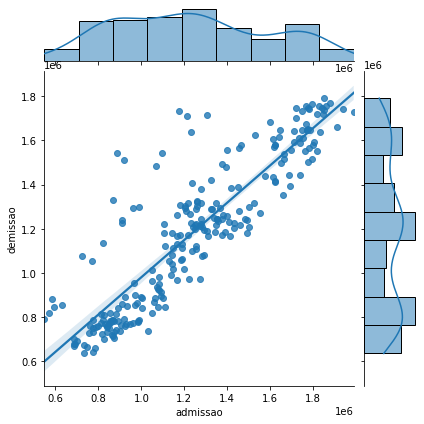

In [74]:
sns.jointplot(y='demissao',x='admissao',data=empregos, kind='reg')

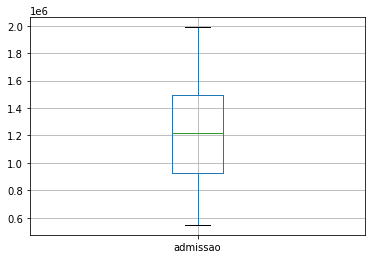

In [82]:
empregos.boxplot('admissao')

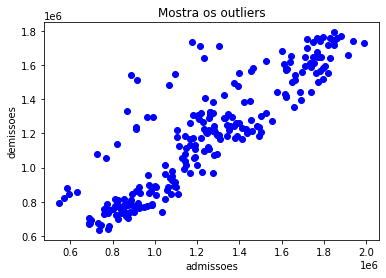

In [80]:
plt.scatter(empregos.admissao, empregos.demissao, c = "blue")
plt.title("Mostra os outliers")
plt.xlabel("admissoes")
plt.ylabel("demissoes")
plt.show()

In [105]:
correlacao = empregos.corr()
correlacao.sort_values("demissao", ascending = False, inplace=True)
print(correlacao.demissao)

demissao    1.000000
admissao    0.881227
data        0.730112
Name: demissao, dtype: float64


In [106]:
correlacao

,data,admissao,demissao
demissao,0.730112,0.881227,1.000000
admissao,0.617609,1.000000,0.881227
data,1.000000,0.617609,0.730112


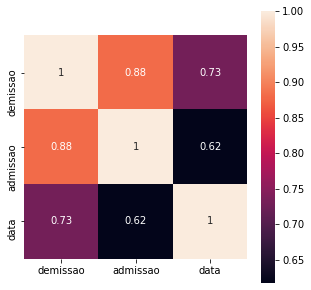

In [88]:
plt.figure(figsize=(5,5))
correlacao = empregos.corr()
corr_cols = correlacao.nlargest(10, 'demissao')['demissao']
sns.heatmap(empregos[corr_cols.index].corr(), annot=True, square=True)